In [21]:
%pylab inline
import gc
import numpy as np
import astropy.io.fits as pyfits

import fpfsBase

Populating the interactive namespace from numpy and matplotlib


In [22]:
cd wrkDir/FPFS2/sim

[Errno 2] No such file or directory: 'wrkDir/FPFS2/sim'
/lustre/work/xiangchong.li/work/FPFS2/sim


In [41]:
gest=[]
C=0
for ifield in range(1000):
    fname1='sim20210301/fpfs-psfRcut-psf60-0/src0000-g1-2222.fits'
    moments1=pyfits.getdata(fname1)
    elli1=fpfsBase.fpfsM2E(moments1,C,rev=True)
    fname2='sim20210301/fpfs-psfRcut-psf60-0/src0000-g1-0000.fits'
    moments2=pyfits.getdata(fname2)
    elli2=fpfsBase.fpfsM2E(moments2,C,rev=True)
    g1p=np.average(elli1['fpfs_e1'])/np.average(elli1['fpfs_RE'])
    g1m=np.average(elli2['fpfs_e1'])/np.average(elli2['fpfs_RE'])
    gest.append(g1m-g1p)
    del elli1,elli2,moments1,moments2
    gc.collect

In [42]:
np.average(gest)/0.04-1

0.0019333796622817978

(array([  1.,  21.,  69., 145., 262., 351., 442., 409., 395., 320., 274.,
        242., 217., 235., 165., 170., 167., 136., 131., 132., 132.,  96.,
        105.,  80.,  92.,  87.,  88.,  79.,  78.,  75.,  64.,  60.,  79.,
         52.,  55.,  53.,  49.,  47.,  54.,  51.,  46.,  46.,  36.,  36.,
         34.,  35.,  38.,  33.,  32.,  29.]),
 array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.,
         180.,  200.,  220.,  240.,  260.,  280.,  300.,  320.,  340.,
         360.,  380.,  400.,  420.,  440.,  460.,  480.,  500.,  520.,
         540.,  560.,  580.,  600.,  620.,  640.,  660.,  680.,  700.,
         720.,  740.,  760.,  780.,  800.,  820.,  840.,  860.,  880.,
         900.,  920.,  940.,  960.,  980., 1000.]),
 <a list of 50 Patch objects>)

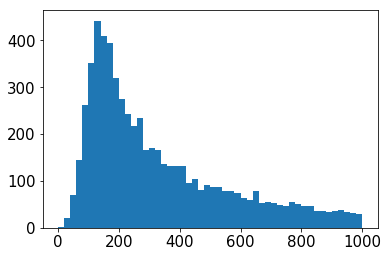

In [15]:
plt.hist(moments['fpfs_M00'],bins=50,range=(0,1e3))

0.14283611727986065


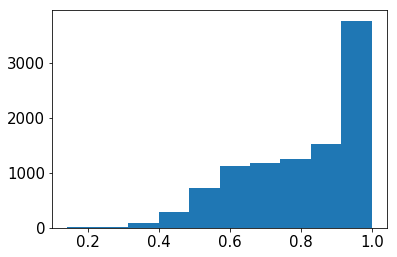

In [18]:
plt.hist(elli['fpfs_s0'])
print(elli['fpfs_s0'].min())

In [20]:
print(-np.average(elli['fpfs_e1'])/np.average(elli['fpfs_RE']))

0.018203436222993523
